## Preparing data with Year=2016

In [1]:
import os
import pandas as pd

merged_df = pd.DataFrame()
extracted_path = '/content/drive/MyDrive/flight'

columns_to_keep = ['FlightDate', 'Quarter', 'Year', 'Month', 'DayofMonth', 'DepTime', 'DepDel15',
                   'CRSDepTime', 'DepDelayMinutes', 'Origin', 'Dest', 'ArrTime', 'CRSArrTime',
                   'ArrDel15', 'ArrDelayMinutes']

flight_codes = ['ATL', 'CLT', 'DEN', 'DFW', 'EWR', 'IAH', 'JFK', 'LAS', 'LAX', 'MCO', 'MIA', 'ORD', 'PHX', 'SEA', 'SFO']

for root, dirs, files in os.walk(os.path.join(extracted_path, '2016')):
    for file_name in files:
        if file_name.endswith('.csv'):
            file_path = os.path.join(root, file_name)
            df = pd.read_csv(file_path, usecols=columns_to_keep)

            filtered_df = df[df['Origin'].isin(flight_codes) & df['Dest'].isin(flight_codes)]
            merged_df = pd.concat([merged_df, filtered_df], ignore_index=True)

merged_df.to_csv('flight_data_2016.csv', index=False)

In [ ]:
import os
import json
import csv

main_directory = "/content/drive/MyDrive/weather"

combined_csv_file_name = "combined_final_weather_data.csv"

with open(combined_csv_file_name, mode="w", newline="") as combined_csv_file:
    csv_writer = csv.writer(combined_csv_file)

    csv_writer.writerow([
        "airport", "date", "time", "temperature_f", "wind_speed", "humidity", "cloud_cover",
        "wind_chill_f", "wind_gust_kmph", "dew_point_f", "pressure", "visibility",
        "precip_mm", "weather_code", "wind_dir_degree"
    ])

    for airport_folder in os.listdir(main_directory):
        airport_path = os.path.join(main_directory, airport_folder)

        if os.path.isdir(airport_path):
            for json_file in os.listdir(airport_path):
                if json_file.endswith(".json") and ("2016" in json_file or "2017" in json_file):

                    json_file_path = os.path.join(airport_path, json_file)

                    with open(json_file_path, "r") as file:
                        month_data = json.load(file)
                    print(json_file_path)
                    airport_code = airport_folder
                    print(airport_code)
                    for day_data in month_data["data"]["weather"]:
                        date = day_data["date"]

                        for hourly_data in day_data["hourly"]:
                            time = hourly_data["time"]
                            wind_speed = hourly_data.get("windspeedKmph", "")
                            wind_dir_degree = hourly_data.get("winddirDegree", "")
                            weather_code = hourly_data.get("weatherCode", "")
                            precip_mm = hourly_data.get("precipMM", "")
                            visibility = hourly_data.get("visibility", "")
                            pressure = hourly_data.get("pressure", "")
                            cloud_cover = hourly_data.get("cloudcover", "")
                            dew_point_f = hourly_data.get("DewPointF", "")
                            wind_gust_kmph = hourly_data.get("WindGustKmph", "")
                            temperature_f = hourly_data.get("tempF", "")
                            wind_chill_f = hourly_data.get("WindChillF", "")
                            humidity = hourly_data.get("humidity", "")

                            csv_writer.writerow([
                                airport_code, date, time,  temperature_f,
                                wind_speed, humidity, cloud_cover, wind_chill_f, wind_gust_kmph, dew_point_f,
                                pressure, visibility, precip_mm, weather_code, wind_dir_degree
                            ])

print(f"Combined data has been saved to {combined_csv_file_name}.")

In [ ]:
flight_data_2016=pd.read_csv('flight_data_2016.csv')
weather=pd.read_csv('weather.csv')
merged_data_2016 = flight_data_2016.merge(weather, left_on=['FlightDate','DepTime','Dest'], right_on=['airport', 'date','time'])
merged_data_2016.to_csv('merged_data_2016.csv', index=False)

## Preparing data with Year=2017 and Merging


In [ ]:
columns_to_keep = ['FlightDate', 'Quarter', 'Year', 'Month', 'DayofMonth', 'DepTime', 'DepDel15',
                   'CRSDepTime', 'DepDelayMinutes', 'Origin', 'Dest', 'ArrTime', 'CRSArrTime',
                   'ArrDel15', 'ArrDelayMinutes']

flight_codes = ['ATL', 'CLT', 'DEN', 'DFW', 'EWR', 'IAH', 'JFK', 'LAS', 'LAX', 'MCO', 'MIA', 'ORD', 'PHX', 'SEA', 'SFO']

for root, dirs, files in os.walk(os.path.join(extracted_path, '2017')):
    for file_name in files:
        if file_name.endswith('.csv'):
            file_path = os.path.join(root, file_name)
            df = pd.read_csv(file_path, usecols=columns_to_keep)

            filtered_df = df[df['Origin'].isin(flight_codes) & df['Dest'].isin(flight_codes)]
            merged_df = pd.concat([merged_df, filtered_df], ignore_index=True)

merged_df.to_csv('flight_data_2017.csv', index=False)

In [ ]:
flight_data_2017=pd.read_csv('flight_data_2017.csv')
merged_data_2017 = flight_data_2017.merge(weather, left_on=['FlightDate','DepTime','Dest'], right_on=['airport', 'date','time'])
merged_data_2017.to_csv('Finaldata.csv', index=False)

## Steps Followed in this Data Science Project
1. Exploratory Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Evaluation

# Exploratory Data Analysis

#### In Data Analysis we will analyze to find out the below stuff:
1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Outliers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Finaldata.csv')
df.drop(df.columns[0],axis=1,inplace=True)
df.head()

,Year,Quarter,Month,DayofMonth,FlightDate,Origin,Dest,CRSDepTime,DepTime,DepDelayMinutes,...,humidity,cloud_cover,wind_chill_f,wind_gust_kmph,dew_point_f,pressure,visibility,precip_mm,weather_code,wind_dir_degree
0,2016,2,5,1,2016-05-01,JFK,LAX,900,931.0,31.0,...,76,56,65,15,54,1013,10,0.0,116,199
1,2016,2,5,1,2016-05-01,JFK,LAX,1000,1002.0,2.0,...,76,56,65,15,54,1013,10,0.0,116,199
2,2016,2,5,1,2016-05-01,MIA,LAX,925,926.0,1.0,...,76,56,65,15,54,1013,10,0.0,116,199
3,2016,2,5,1,2016-05-01,ORD,LAX,955,955.0,0.0,...,76,56,65,15,54,1013,10,0.0,116,199
4,2016,2,5,1,2016-05-01,DFW,LAX,1055,1051.0,0.0,...,76,56,65,15,54,1013,10,0.0,116,199


In [3]:
df.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'FlightDate', 'Origin',
       'Dest', 'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDel15',
       'CRSArrTime', 'ArrTime', 'ArrDelayMinutes', 'ArrDel15', 'Time',
       'airport', 'date', 'time', 'temperature_f', 'wind_speed', 'humidity',
       'cloud_cover', 'wind_chill_f', 'wind_gust_kmph', 'dew_point_f',
       'pressure', 'visibility', 'precip_mm', 'weather_code',
       'wind_dir_degree'],
      dtype='object')

In [4]:
df.isnull().mean()

Year               0.0
Quarter            0.0
Month              0.0
DayofMonth         0.0
FlightDate         0.0
Origin             0.0
Dest               0.0
CRSDepTime         0.0
DepTime            0.0
DepDelayMinutes    0.0
DepDel15           0.0
CRSArrTime         0.0
ArrTime            0.0
ArrDelayMinutes    0.0
ArrDel15           0.0
Time               0.0
airport            0.0
date               0.0
time               0.0
temperature_f      0.0
wind_speed         0.0
humidity           0.0
cloud_cover        0.0
wind_chill_f       0.0
wind_gust_kmph     0.0
dew_point_f        0.0
pressure           0.0
visibility         0.0
precip_mm          0.0
weather_code       0.0
wind_dir_degree    0.0
dtype: float64

In [5]:
df.shape

(1850481, 31)

In [6]:
df.dtypes

Year                 int64
Quarter              int64
Month                int64
DayofMonth           int64
FlightDate          object
Origin              object
Dest                object
CRSDepTime           int64
DepTime            float64
DepDelayMinutes    float64
DepDel15           float64
CRSArrTime           int64
ArrTime            float64
ArrDelayMinutes    float64
ArrDel15           float64
Time                 int64
airport             object
date                object
time                 int64
temperature_f        int64
wind_speed           int64
humidity             int64
cloud_cover          int64
wind_chill_f         int64
wind_gust_kmph       int64
dew_point_f          int64
pressure             int64
visibility           int64
precip_mm          float64
weather_code         int64
wind_dir_degree      int64
dtype: object

In [7]:
# Number of distinct values in variables
for i, column in enumerate(df.columns):
    print("{}. ".format(i) + str(column.title()) + ": {}". format(df[column].nunique()))

0. Year: 2
1. Quarter: 4
2. Month: 12
3. Dayofmonth: 31
4. Flightdate: 731
5. Origin: 15
6. Dest: 15
7. Crsdeptime: 1255
8. Deptime: 1432
9. Depdelayminutes: 1078
10. Depdel15: 2
11. Crsarrtime: 1421
12. Arrtime: 1439
13. Arrdelayminutes: 1075
14. Arrdel15: 2
15. Time: 24
16. Airport: 15
17. Date: 731
18. Time: 24
19. Temperature_F: 131
20. Wind_Speed: 56
21. Humidity: 98
22. Cloud_Cover: 101
23. Wind_Chill_F: 146
24. Wind_Gust_Kmph: 83
25. Dew_Point_F: 99
26. Pressure: 66
27. Visibility: 21
28. Precip_Mm: 229
29. Weather_Code: 43
30. Wind_Dir_Degree: 361


In [8]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  26


,Year,Quarter,Month,DayofMonth,CRSDepTime,DepTime,DepDelayMinutes,DepDel15,CRSArrTime,ArrTime,...,humidity,cloud_cover,wind_chill_f,wind_gust_kmph,dew_point_f,pressure,visibility,precip_mm,weather_code,wind_dir_degree
0,2016,2,5,1,900,931.0,31.0,1.0,1217,1226.0,...,76,56,65,15,54,1013,10,0.0,116,199
1,2016,2,5,1,1000,1002.0,2.0,0.0,1310,1253.0,...,76,56,65,15,54,1013,10,0.0,116,199
2,2016,2,5,1,925,926.0,1.0,0.0,1215,1236.0,...,76,56,65,15,54,1013,10,0.0,116,199
3,2016,2,5,1,955,955.0,0.0,0.0,1223,1232.0,...,76,56,65,15,54,1013,10,0.0,116,199
4,2016,2,5,1,1055,1051.0,0.0,0.0,1223,1217.0,...,76,56,65,15,54,1013,10,0.0,116,199


In [9]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
print(discrete_feature)
df[discrete_feature].head()

Discrete Variables Count: 8
['Year', 'Quarter', 'Month', 'DepDel15', 'ArrDel15', 'Time', 'time', 'visibility']


,Year,Quarter,Month,DepDel15,ArrDel15,Time,time,visibility
0,2016,2,5,1.0,0.0,1200,1200,10
1,2016,2,5,0.0,0.0,1200,1200,10
2,2016,2,5,0.0,1.0,1200,1200,10
3,2016,2,5,0.0,0.0,1200,1200,10
4,2016,2,5,0.0,0.0,1200,1200,10


In [10]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 18


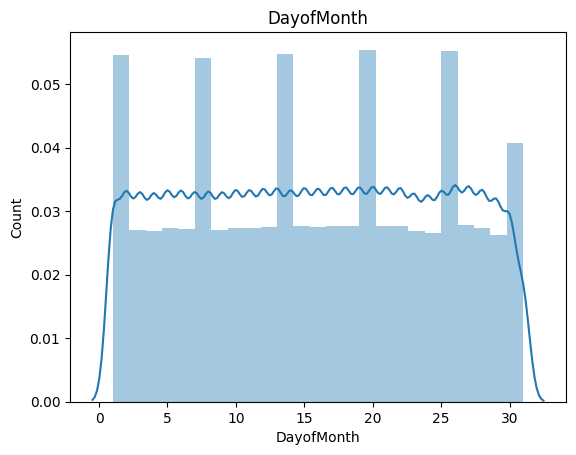

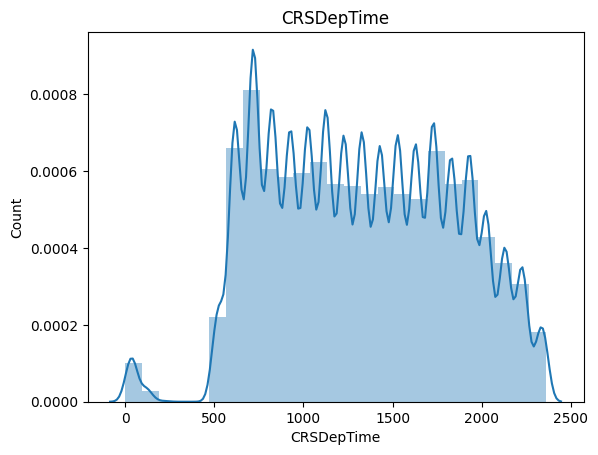

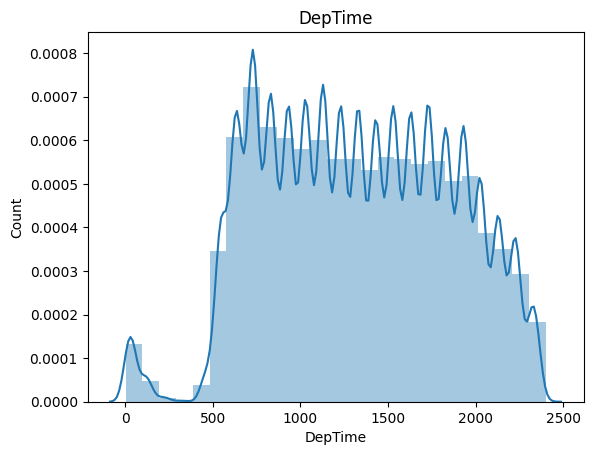

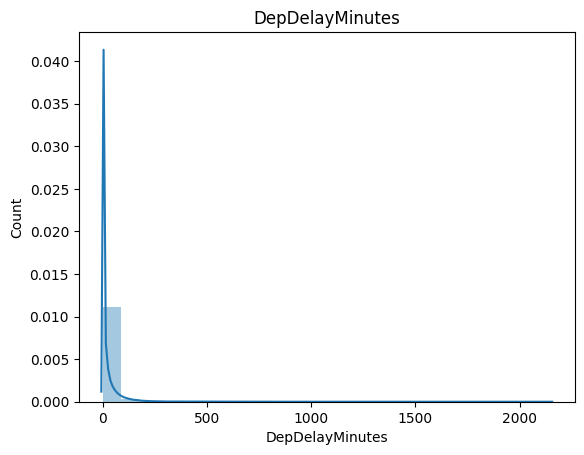

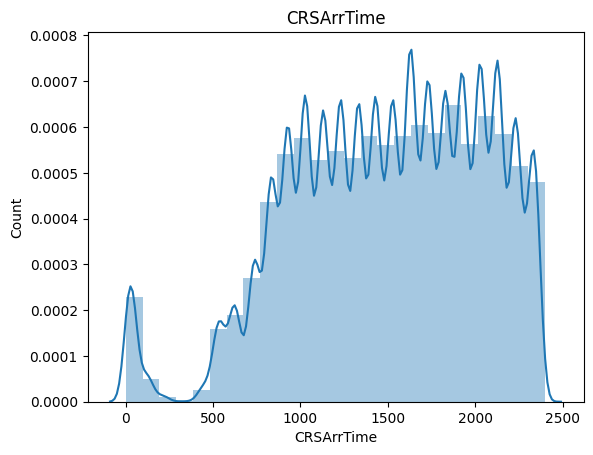

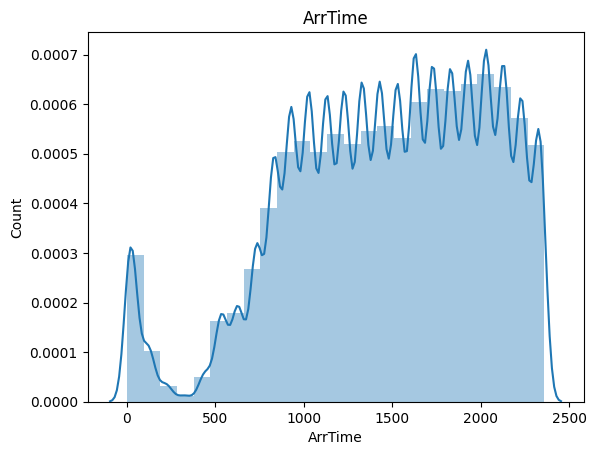

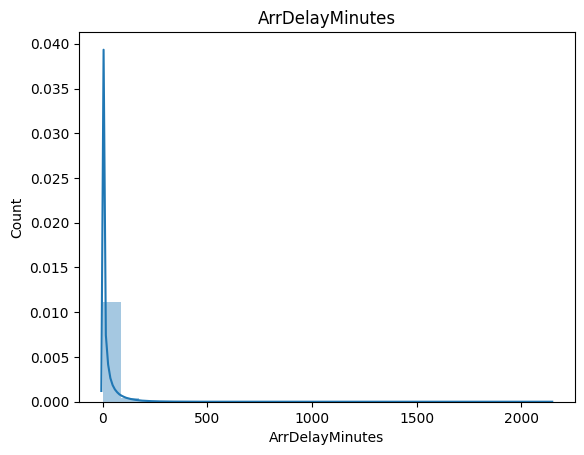

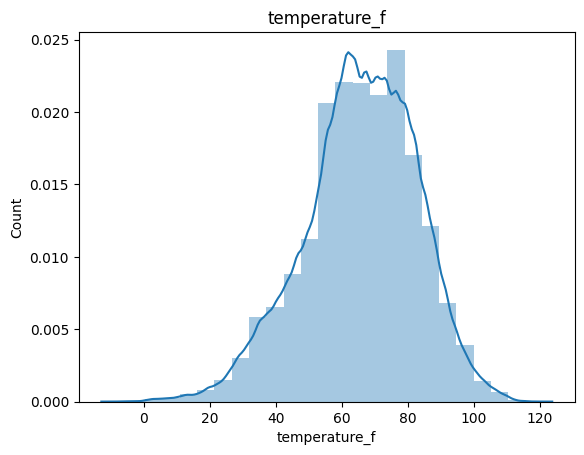

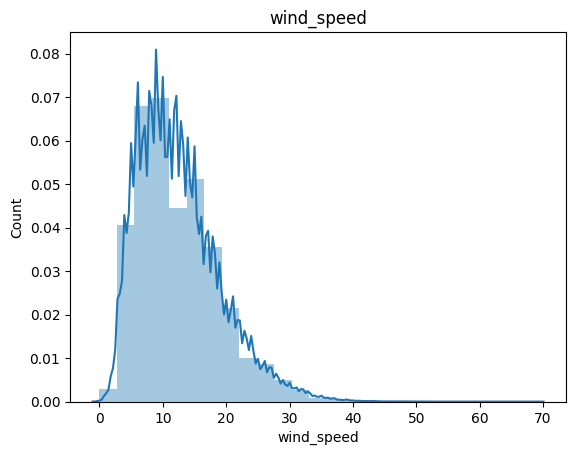

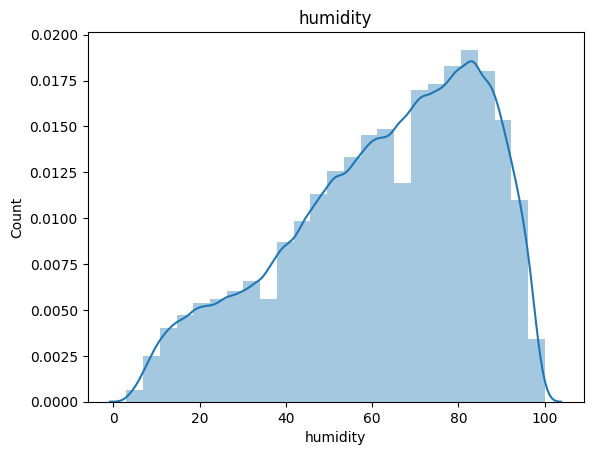

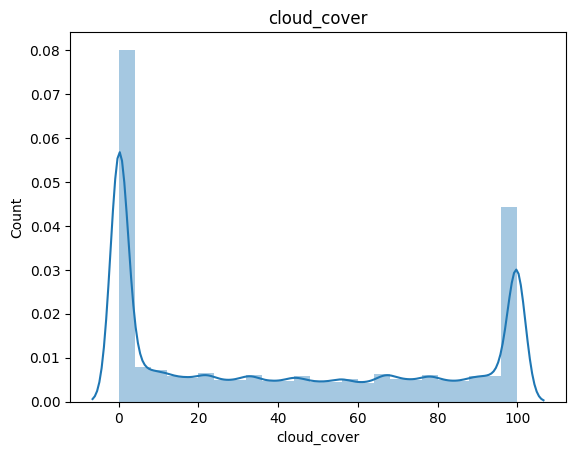

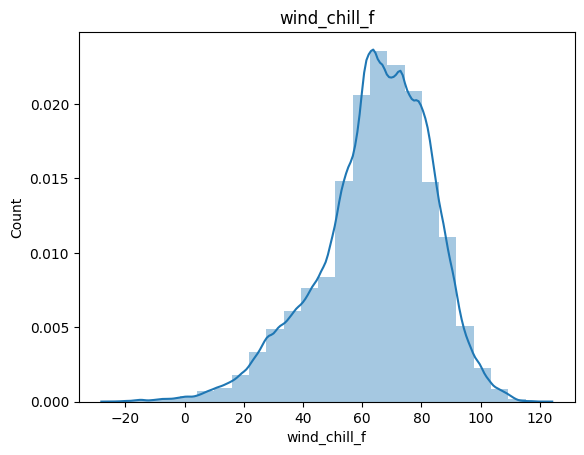

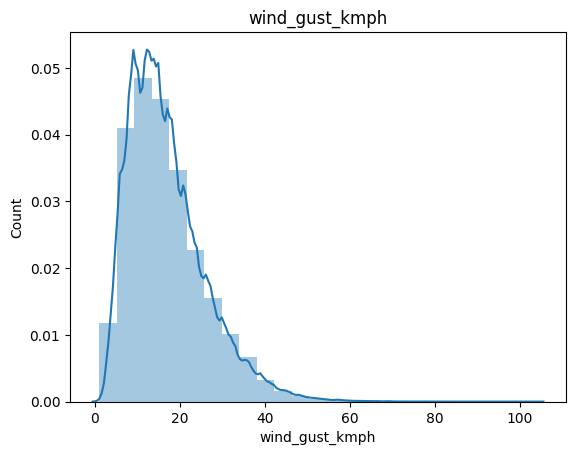

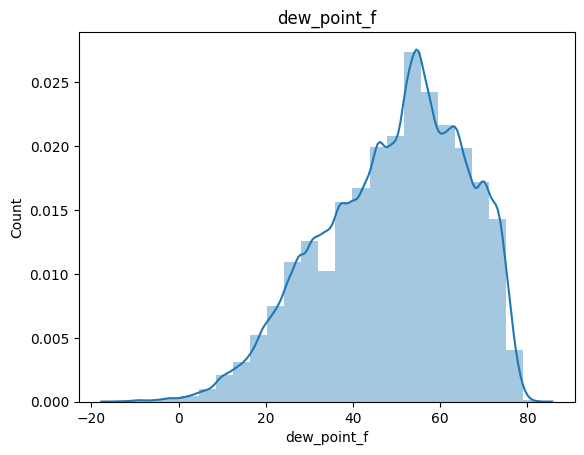

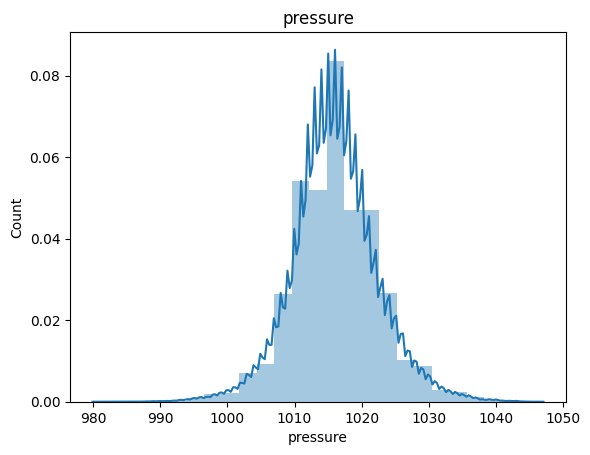

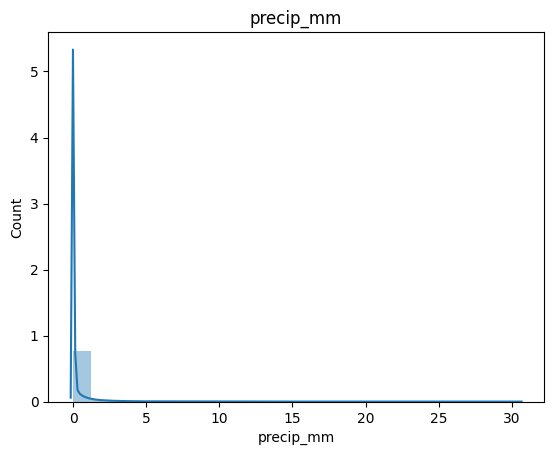

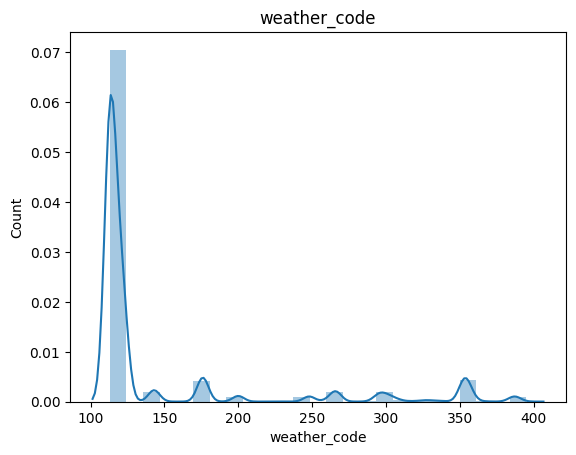

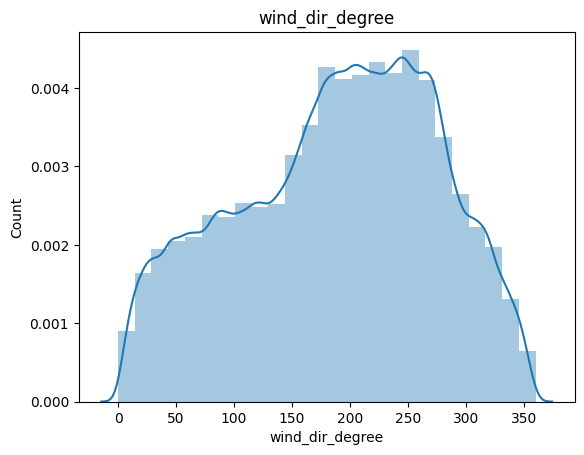

In [11]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    sns.distplot(df[feature],bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [12]:
# list of categorical variables
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical variables: ', len(categorical_features))
# visualise the categorical variables
df[categorical_features].head()

Number of categorical variables:  5


,FlightDate,Origin,Dest,airport,date
0,2016-05-01,JFK,LAX,LAX,2016-05-01
1,2016-05-01,JFK,LAX,LAX,2016-05-01
2,2016-05-01,MIA,LAX,LAX,2016-05-01
3,2016-05-01,ORD,LAX,LAX,2016-05-01
4,2016-05-01,DFW,LAX,LAX,2016-05-01


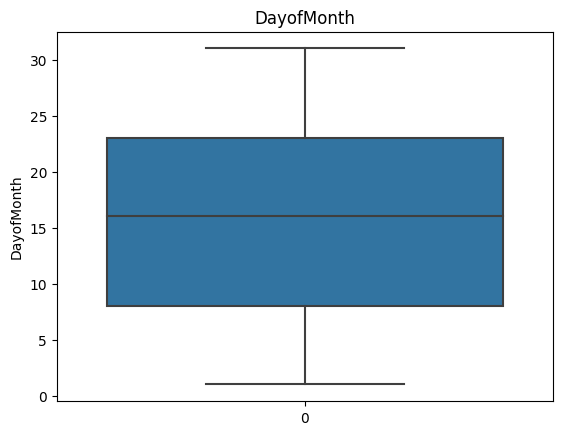

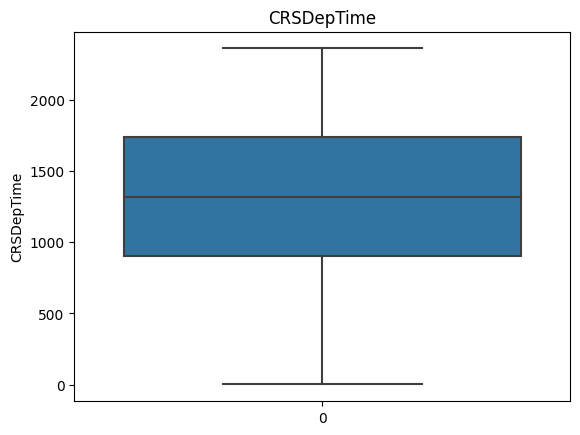

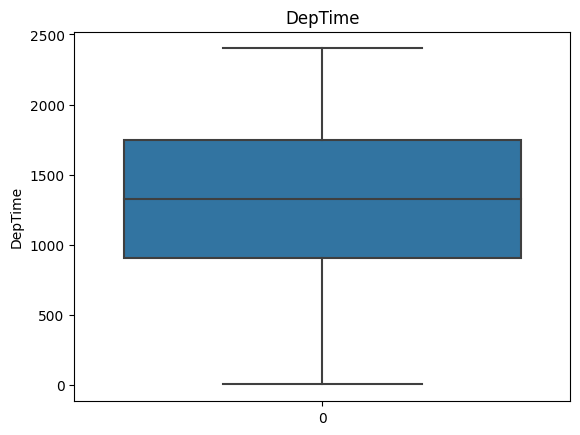

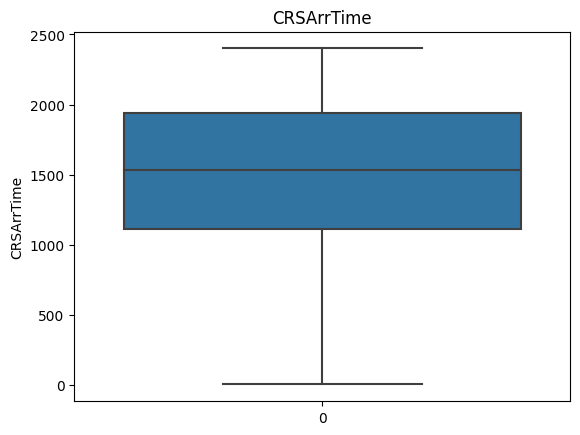

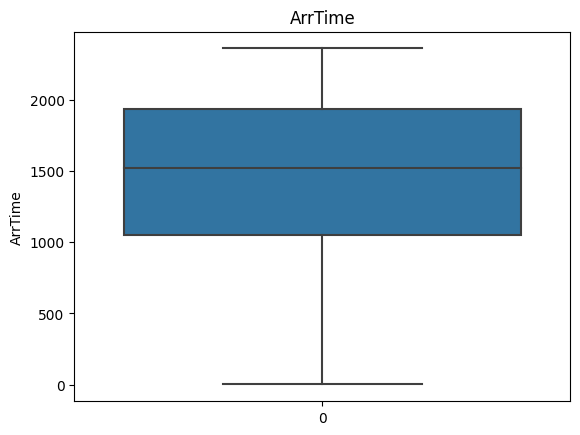

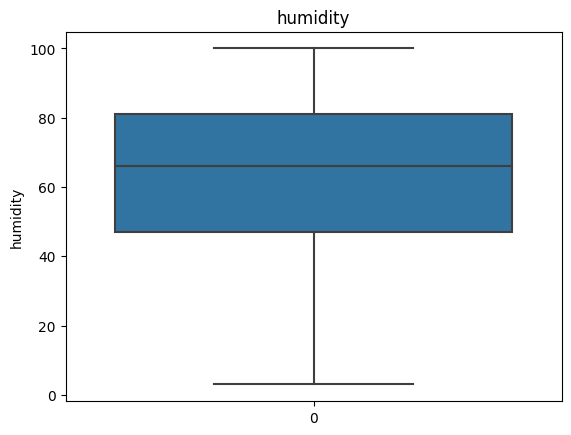

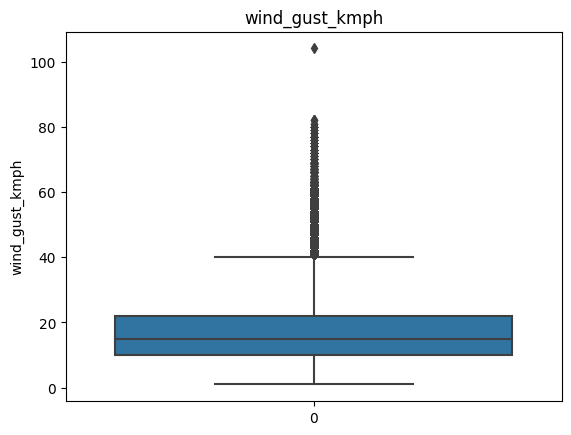

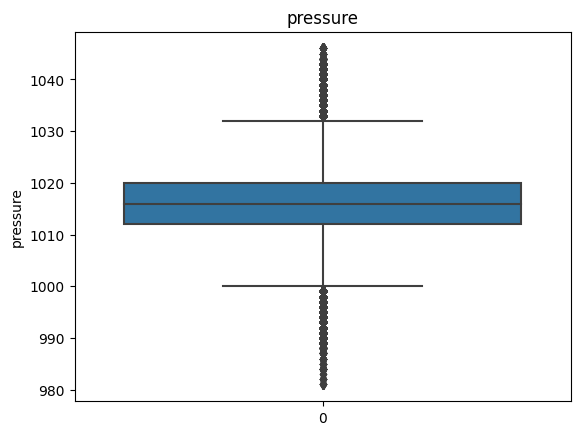

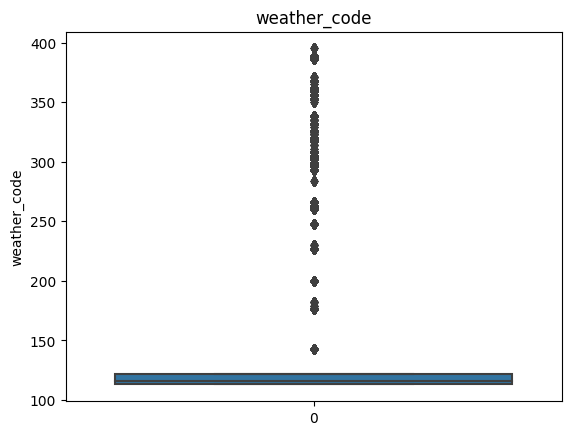

In [13]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        sns.boxplot(df[feature])
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

# Data Preprocessing
We will be performing all the below step

1. Outlier Handling
3. Encoding Categorical Variables
3. Normalisation of Variables

### Outlier Handling

In [14]:
IQR=df.wind_gust_kmph.quantile(0.75)-df.wind_gust_kmph.quantile(0.25)
lower_bridge=df['wind_gust_kmph'].quantile(0.25)-(IQR*3)
upper_bridge=df['wind_gust_kmph'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)
df.loc[df['wind_gust_kmph']<=lower_bridge,'wind_gust_kmph']=lower_bridge
df.loc[df['wind_gust_kmph']>=upper_bridge,'wind_gust_kmph']=upper_bridge

-26.0
58.0


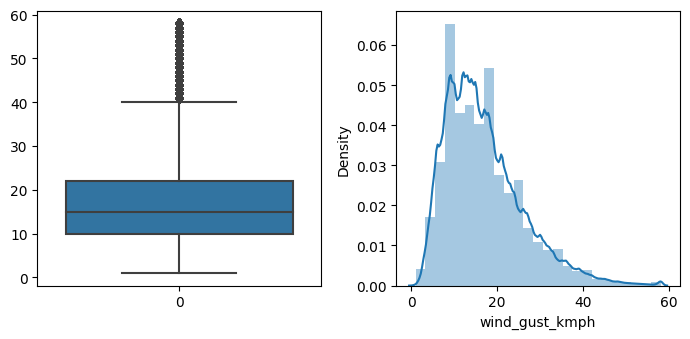

In [15]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
sns.boxplot(df['wind_gust_kmph'],ax=axes[0])
sns.distplot(df['wind_gust_kmph'],bins=25, ax=axes[1])
plt.show()

In [16]:
IQR=df.pressure.quantile(0.75)-df.pressure.quantile(0.25)
lower_bridge=df['pressure'].quantile(0.25)-(IQR*3)
upper_bridge=df['pressure'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)
df.loc[df['pressure']<=lower_bridge,'pressure']=lower_bridge
df.loc[df['pressure']>=upper_bridge,'pressure']=upper_bridge

988.0
1044.0


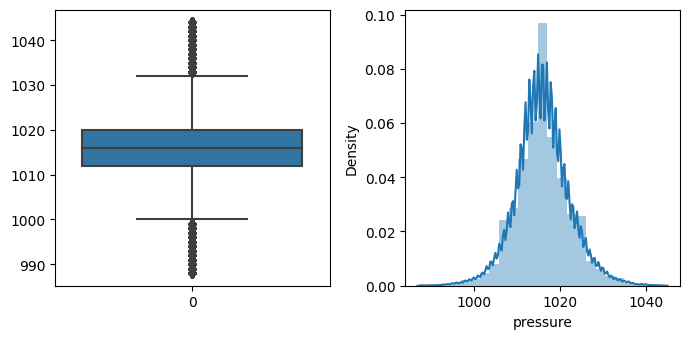

In [17]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
sns.boxplot(df['pressure'],ax=axes[0])
sns.distplot(df['pressure'],bins=25, ax=axes[1])
plt.show()

In [18]:
## Outlier Handling
IQR=df.weather_code.quantile(0.75)-df.weather_code.quantile(0.25)
lower_bridge=df['weather_code'].quantile(0.25)-(IQR*3)
upper_bridge=df['weather_code'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)
df.loc[df['weather_code']<=lower_bridge,'weather_code']=lower_bridge
df.loc[df['weather_code']>=upper_bridge,'weather_code']=upper_bridge

86.0
149.0


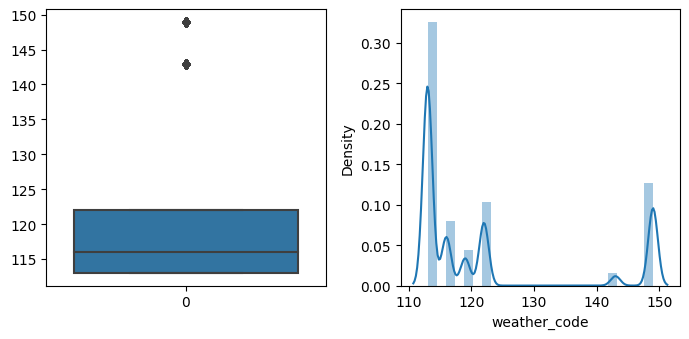

In [19]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
sns.boxplot(df['weather_code'],ax=axes[0])
sns.distplot(df['weather_code'],bins=25, ax=axes[1])
plt.show()

### Encoding Categorical Variables

In [20]:
print(numerical_features)

['Year', 'Quarter', 'Month', 'DayofMonth', 'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDel15', 'CRSArrTime', 'ArrTime', 'ArrDelayMinutes', 'ArrDel15', 'Time', 'time', 'temperature_f', 'wind_speed', 'humidity', 'cloud_cover', 'wind_chill_f', 'wind_gust_kmph', 'dew_point_f', 'pressure', 'visibility', 'precip_mm', 'weather_code', 'wind_dir_degree']


In [21]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

label_encoder = LabelEncoder()
df['Origin'] = label_encoder.fit_transform(df['Origin'])
df['Dest'] = label_encoder.fit_transform(df['Dest'])
df['airport'] = label_encoder.fit_transform(df['airport'])

### Normalisation
If a bell-curve is in the data then standardization is more preferable. For this, you will have to plot your data. If dataset has extremely high or low values (outliers) then standardization is more preferred because usually, normalization will compress these values into a small range.

In [22]:
norm=['Quarter', 'Month', 'DayofMonth', 'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'CRSArrTime', 'ArrTime', 'ArrDelayMinutes', 'ArrDel15', 'Time', 'time', 'temperature_f', 'wind_speed', 'humidity', 'cloud_cover', 'wind_chill_f', 'wind_gust_kmph', 'dew_point_f', 'pressure', 'visibility', 'precip_mm', 'weather_code', 'wind_dir_degree']

scaler = StandardScaler()
df['DepDel15'] = df['DepDel15'].astype(int)

df[norm] = scaler.fit_transform(df[norm])
df.head()

,Year,Quarter,Month,DayofMonth,FlightDate,Origin,Dest,CRSDepTime,DepTime,DepDelayMinutes,...,humidity,cloud_cover,wind_chill_f,wind_gust_kmph,dew_point_f,pressure,visibility,precip_mm,weather_code,wind_dir_degree
0,2016,-0.466365,-0.454582,-1.679883,2016-05-01,6,8,-0.835114,-0.753826,0.408709,...,0.597,0.362149,0.02503,-0.207362,0.280286,-0.48222,0.293644,-0.260127,-0.461992,0.121505
1,2016,-0.466365,-0.454582,-1.679883,2016-05-01,6,8,-0.639569,-0.619081,-0.289790,...,0.597,0.362149,0.02503,-0.207362,0.280286,-0.48222,0.293644,-0.260127,-0.461992,0.121505
2,2016,-0.466365,-0.454582,-1.679883,2016-05-01,10,8,-0.786228,-0.763316,-0.313876,...,0.597,0.362149,0.02503,-0.207362,0.280286,-0.48222,0.293644,-0.260127,-0.461992,0.121505
3,2016,-0.466365,-0.454582,-1.679883,2016-05-01,11,8,-0.727565,-0.708279,-0.337962,...,0.597,0.362149,0.02503,-0.207362,0.280286,-0.48222,0.293644,-0.260127,-0.461992,0.121505
4,2016,-0.466365,-0.454582,-1.679883,2016-05-01,3,8,-0.532020,-0.526087,-0.337962,...,0.597,0.362149,0.02503,-0.207362,0.280286,-0.48222,0.293644,-0.260127,-0.461992,0.121505


# Feature Selection

Performing feature selection using Correlation matrix.
Here we will select only highly correlated variable with target column.

<Axes: >

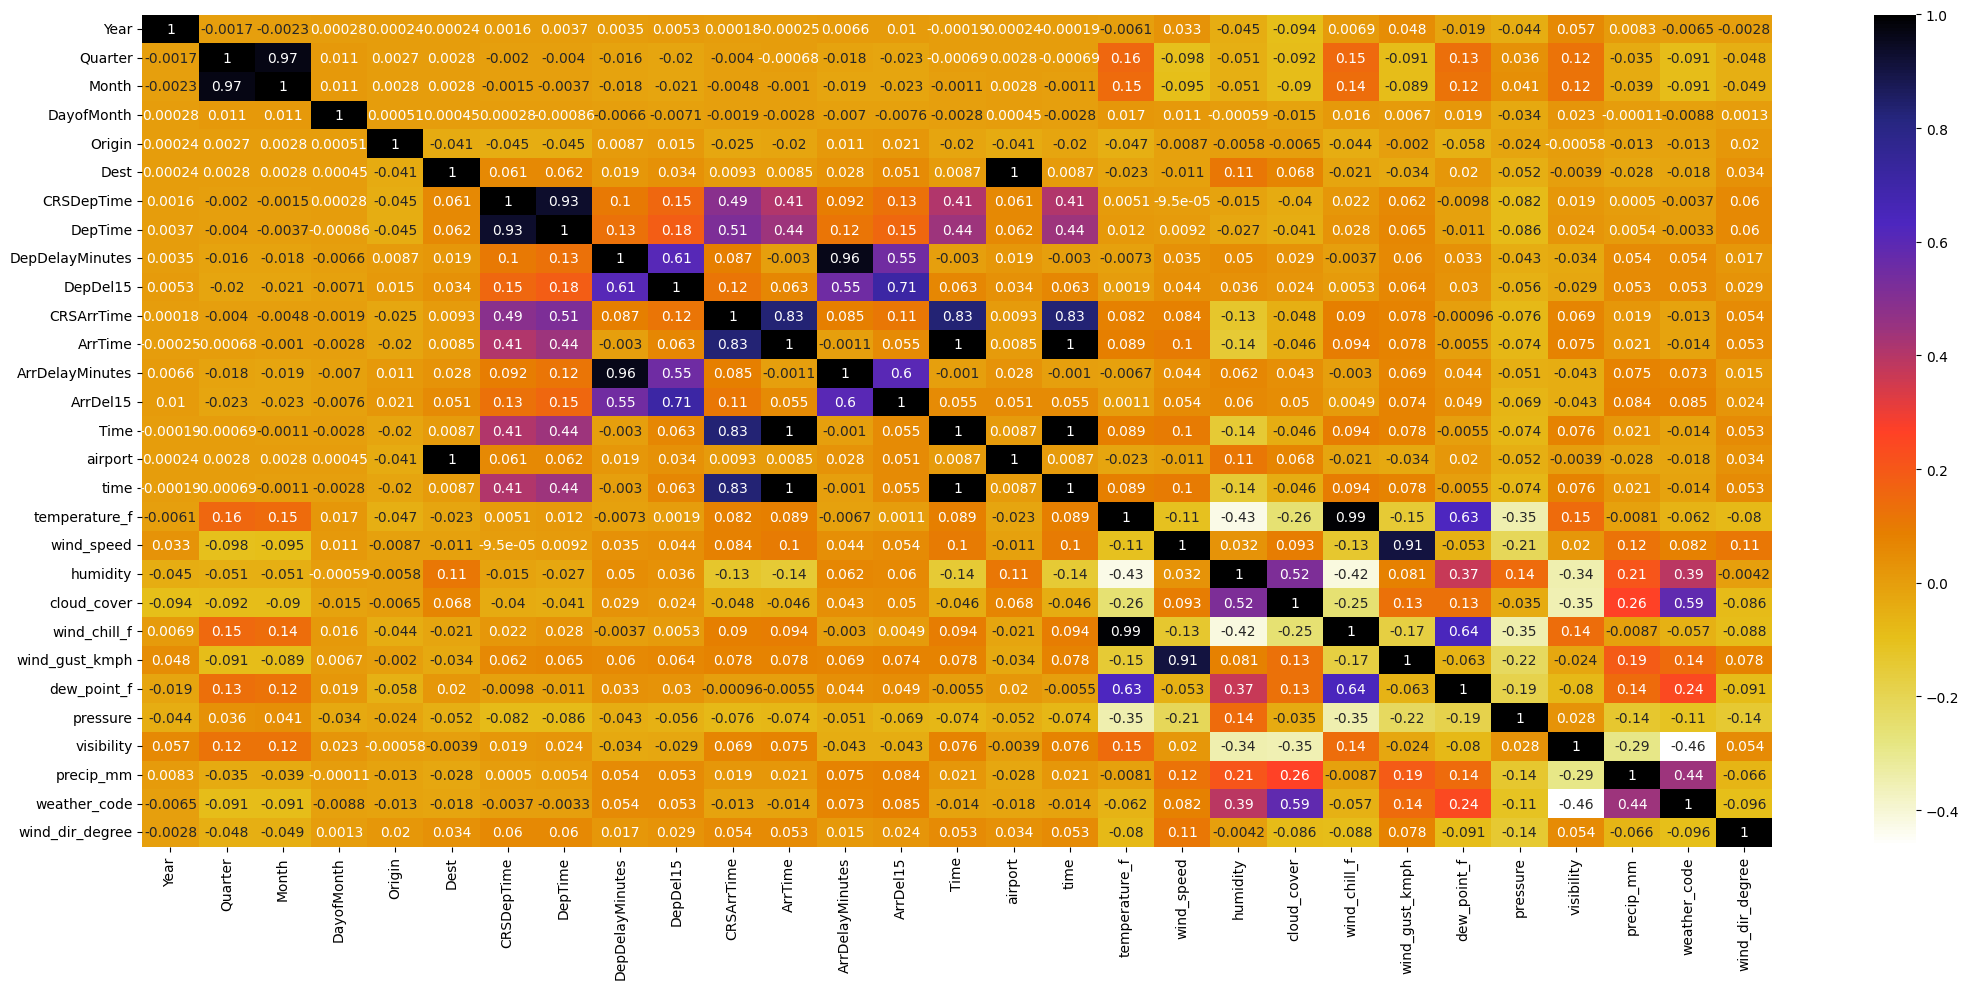

In [23]:
df.corr()
plt.figure(figsize=(22,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)

In [24]:
# Set the correlation threshold for removal
correlation_threshold = 0.1
# Identify highly correlated variables with the target column
correlated_variables = cor['DepDel15'][abs(cor['DepDel15']) > correlation_threshold].index
print(correlated_variables)

Index(['CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDel15', 'CRSArrTime',
       'ArrDelayMinutes', 'ArrDel15'],
      dtype='object')


## Model Training - XGBoost and Random Forest Classifier

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [26]:
X = df[['CRSDepTime', 'DepTime', 'DepDelayMinutes', 'CRSArrTime',
       'ArrDelayMinutes', 'ArrDel15']]  # Features
y = df['DepDel15']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# 1. RandomForest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate RandomForest Model
print("RandomForest Classifier Results:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))

# 2. XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluate XGBoost Model
print("\nXGBoost Classifier Results:")
print("Accuracy:", accuracy_score(y_test, xgb_predictions))
print("Classification Report:\n", classification_report(y_test, xgb_predictions))

RandomForest Classifier Results:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    295570
           1       1.00      1.00      1.00     74527

    accuracy                           1.00    370097
   macro avg       1.00      1.00      1.00    370097
weighted avg       1.00      1.00      1.00    370097


XGBoost Classifier Results:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    295570
           1       1.00      1.00      1.00     74527

    accuracy                           1.00    370097
   macro avg       1.00      1.00      1.00    370097
weighted avg       1.00      1.00      1.00    370097



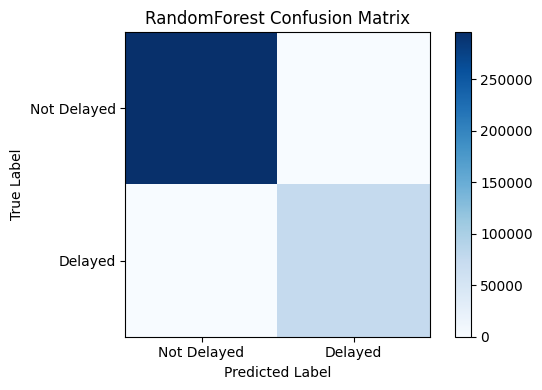

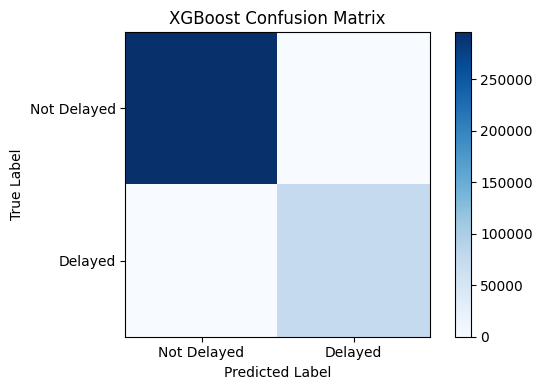

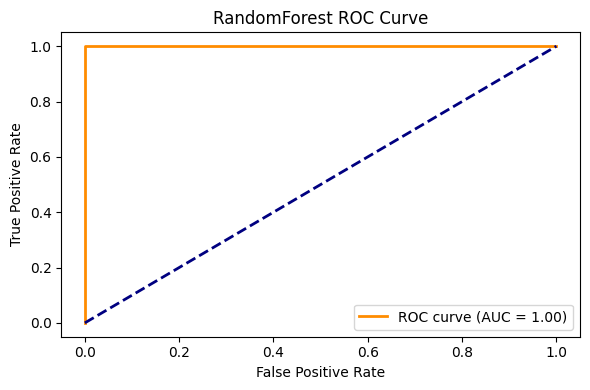

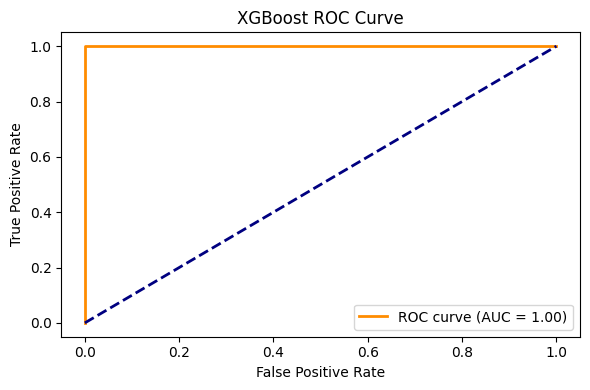

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Assuming you have already trained RandomForest (rf_model) and XGBoost (xgb_model) models

# Function to plot confusion matrix
def plot_confusion_matrix(model, X, y_true, title):
    y_pred = model.predict(X)
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks([0, 1], ['Not Delayed', 'Delayed'])
    plt.yticks([0, 1], ['Not Delayed', 'Delayed'])
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(model, X, y_true, title):
    y_pred_prob = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(rf_model, X_test, y_test, 'RandomForest Confusion Matrix')
plot_confusion_matrix(xgb_model, X_test, y_test, 'XGBoost Confusion Matrix')

# Plot ROC curves
plot_roc_curve(rf_model, X_test, y_test, 'RandomForest ROC Curve')
plot_roc_curve(xgb_model, X_test, y_test, 'XGBoost ROC Curve')
